In [1]:

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

shared_dir = '/Users/prateek/Desktop/ML/Major/data/'
input_shape = [32, 32]
batch = 32

training_set = image_dataset_from_directory(shared_dir,
                                            validation_split=0.2,
                                            subset="training",
                                            batch_size=batch,
                                            seed=1,
                                            color_mode='rgb',
                                            image_size=input_shape)

val_dataset = image_dataset_from_directory(shared_dir,
                                            validation_split=0.2,
                                            subset="validation",
                                            batch_size=batch,
                                            seed=1,
                                            color_mode='rgb',
                                            image_size=input_shape)

input_shape.append(3)
print(input_shape)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-24 11:52:08.112189: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 11:52:08.112468: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 27558 files belonging to 2 classes.
Using 5511 files for validation.
[32, 32, 3]


In [2]:
def augment_images(x, config):
    if config['use_contrast'] == "True":
        x = tf.keras.layers.experimental.preprocessing.RandomContrast(
            config['contrast_factor']
        )(x)

    if config['use_rotation'] == "True":
        x = tf.keras.layers.experimental.preprocessing.RandomRotation(
            config['rotation_factor']
        )(x)
    
    if config['use_flip'] == "True":
        x = tf.keras.layers.experimental.preprocessing.RandomFlip(
            config['flip_mode']
        )(x)

    return x

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

# for images, labels in training_set.take(1):
#     cv2_imshow(images[0].numpy().astype('int32'))
#     plt.figure(figsize=(12, 12))
#     first_image = images[0]
#     for i in range(12):
#         ax = plt.subplot(3, 4, i + 1)
#         augmented_image = data_augmentation(
#             tf.expand_dims(first_image, 0)
#         )
#         plt.imshow(augmented_image[0].numpy().astype("int32"))
#         plt.axis("off")

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras import Model, Input
from keras.applications.xception import Xception, preprocess_input
from keras.callbacks import LearningRateScheduler
import numpy as np

epochs = 300
dropout_rate = 0.2
len_classes = 5

inputs = Input(shape=input_shape)
# x = augment_images(inputs) 
x = preprocess_input(inputs)
x = Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=input_shape)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(8, kernel_size=(4, 4),activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(4, kernel_size=(3, 3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs, outputs)
model.summary()

optimizer = tf.keras.optimizers.Adam(lr=0.01, epsilon=0.1)
optimizer.learning_rate.assign(0.01)

def lr_scheduler(epoch, lr):
    decay_rate = 0.5
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * pow(decay_rate, np.floor(epoch / decay_step))
    return lr

callbacks = [LearningRateScheduler(lr_scheduler, verbose=1)]

model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=keras.metrics.BinaryAccuracy())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 32, 32, 3)        0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 32, 32, 3)        0         
 bda)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                           

/Users/prateek/venv/ml/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:

history = model.fit(training_set, epochs=epochs, validation_data=val_dataset) 


Epoch 1/300


2022-04-24 12:31:31.098835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


689/689 [==============================] - ETA: 0s - loss: 0.6065 - binary_accuracy: 0.6173

2022-04-24 12:31:53.588660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


689/689 [==============================] - 27s 35ms/step - loss: 0.6065 - binary_accuracy: 0.6173 - val_loss: 0.3992 - val_binary_accuracy: 0.8420
Epoch 2/300
689/689 [==============================] - 24s 34ms/step - loss: 0.1769 - binary_accuracy: 0.9299 - val_loss: 0.1071 - val_binary_accuracy: 0.9657
Epoch 3/300
689/689 [==============================] - 24s 35ms/step - loss: 0.0890 - binary_accuracy: 0.9691 - val_loss: 0.0884 - val_binary_accuracy: 0.9724
Epoch 4/300
689/689 [==============================] - 26s 38ms/step - loss: 0.0722 - binary_accuracy: 0.9765 - val_loss: 0.0709 - val_binary_accuracy: 0.9757
Epoch 5/300
689/689 [==============================] - 24s 34ms/step - loss: 0.0653 - binary_accuracy: 0.9789 - val_loss: 0.0675 - val_binary_accuracy: 0.9782
Epoch 6/300
689/689 [==============================] - 23s 33ms/step - loss: 0.0614 - binary_accuracy: 0.9797 - val_loss: 0.0674 - val_binary_accuracy: 0.9768
Epoch 7/300
689/689 [==============================] - 24s

loss
binary_accuracy
val_loss
val_binary_accuracy


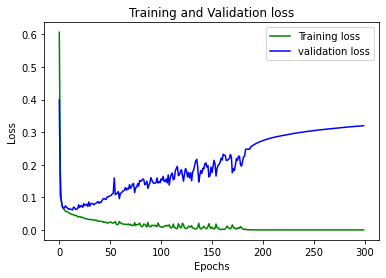

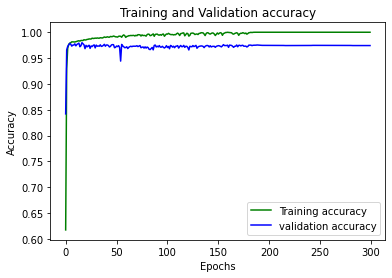

In [9]:
import matplotlib.pyplot as plt

for key in history.history.keys():
    print(key)
loss_train = history.history['loss']
loss_val = history.history['val_loss']
no_epochs = range(epochs)
plt.plot(no_epochs, loss_train, 'g', label='Training loss')
plt.plot(no_epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss_train = history.history['binary_accuracy']
loss_val = history.history['val_binary_accuracy']
plt.plot(no_epochs, loss_train, 'g', label='Training accuracy')
plt.plot(no_epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
max = max(loss_val)
print("acc = ", max)
print("at epch = ", loss_val.index(max))

acc =  0.9798585176467896
at epch =  16
